In [21]:
# !pip install wordcloud
# !pip install --upgrade pip
# !pip install nltk
# !pip install bs4


In [56]:
import pandas as pd
import numpy as np
import os
import re,string,unicodedata
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [76]:
def get_hashtags(s):
    hashwords = re.findall(r"#(\w+)", s)
    return " ".join(hashwords)

def get_mentions(s):
    mentions = re.findall("(?<![@\w])@(\w{1,25})", s)
    return " ".join(mentions)

def cleaner(phrase):
    #cleaning out the sentences 
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
  
  # general
    phrase = re.sub(r"n\'t"," not", phrase)
    phrase = re.sub(r"\'re'"," are", phrase)
    phrase = re.sub(r"\'s"," is", phrase)
    phrase = re.sub(r"\'ll"," will", phrase)
    phrase = re.sub(r"\'d"," would", phrase)
    phrase = re.sub(r"\'t"," not", phrase)
    phrase = re.sub(r"\'ve"," have", phrase)
    phrase = re.sub(r"\'m"," am", phrase)
    
    return phrase


def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [57]:
train_data = pd.read_csv(os.getcwd() + "/data/Corona_NLP_train.csv", encoding = 'latin-1')
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [58]:
train_data.describe

<bound method NDFrame.describe of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @Me

<h2> Identify the null values </h2>

In [59]:
train_data[train_data.isnull().any(axis=1)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
14,3813,48765,NaN,16-03-2020,ADARA Releases COVID-19 Resource Center for Tr...,Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive
41151,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive


<h2> Tweets from different locations </h2>

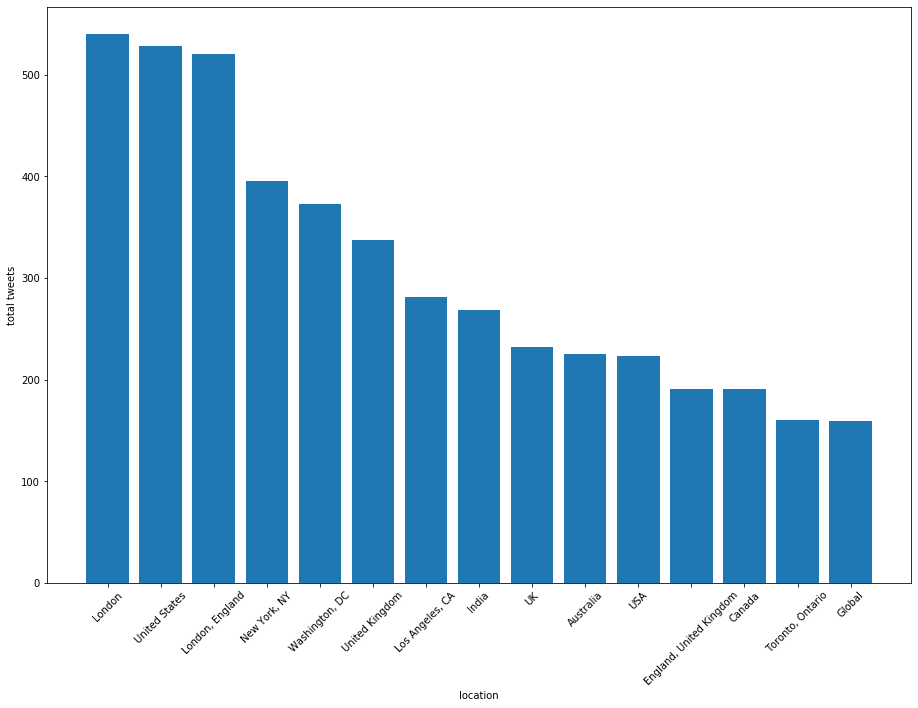

In [60]:
location = train_data['Location'].value_counts().nlargest(n=15)

train_data['Location'] = train_data['Location'].str.replace('\W','')

train_data['Location'].fillna(method = 'ffill', inplace = True)

train_data[train_data.isnull().any(axis=1)]

fig = plt.figure(figsize=(12,8))
bx = fig.add_axes([0,0,1,1])
bx.bar(location.index, location.values)
plt.xticks(rotation=45)
bx.set_ylabel("total tweets")
bx.set_xlabel("location")
fig.show()

<h2> Distribution of Sentiments in the dataset </h2>

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


Text(0.5, 0, 'sentiments')

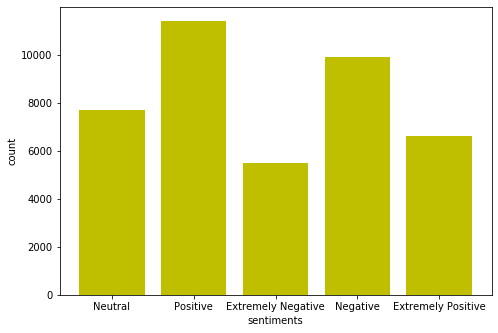

In [61]:
print(train_data['Sentiment'].unique())

sentiments = []
values = []

for key, value in Counter(train_data['Sentiment']).items():
    sentiments.append(key)
    values.append(value)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentiments,values, color=['y'])
ax.set_ylabel('count')
ax.set_xlabel('sentiments')

<h2> Finding all the hashtags </h2>

In [62]:
train_data['hashtags'] =  train_data['OriginalTweet'].apply(lambda x : get_hashtags(x))
allHashTags = list(train_data[(train_data['hashtags']!=None) & (train_data['hashtags']!='')]['hashtags'])
allHashTags = [tag.lower() for tag in allHashTags]
hash_dict = dict(Counter(allHashTags))
top_hash_df = pd.DataFrame(list(hash_dict.items()), columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:15]

top_hash_df.head()

,word,count
7,coronavirus,3354
2,covid_19,723
17,covid2019,420
8,coronavirus covid19,349
134,covid19 coronavirus,257


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

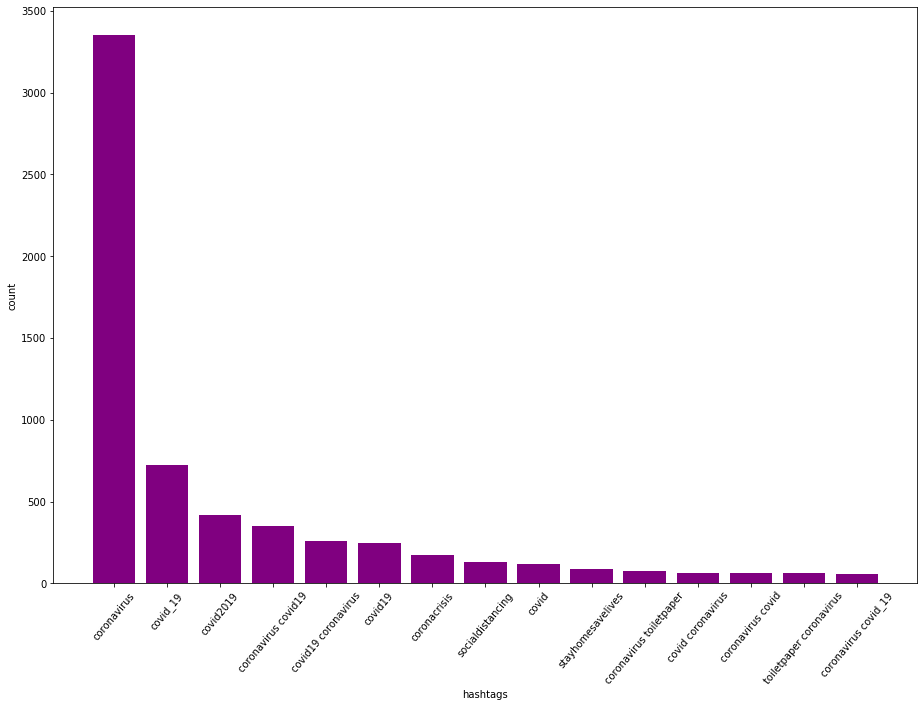

In [63]:
fig = plt.figure()
fig = plt.figure(figsize=(12,8))
cx = fig.add_axes([0,0,1,1])
cx.bar(top_hash_df['word'],top_hash_df['count'], color=['purple'])
cx.set_ylabel('count')
cx.set_xlabel('hashtags')
plt.xticks(rotation=50)

<h2>Finding all the mentions in tweets</h2>

In [64]:
train_data['mentions'] = train_data['OriginalTweet'].apply(lambda x : get_mentions(x))

allMentions = list(train_data[(train_data['mentions'] != None) & (train_data['mentions'] != "")]['mentions'])
allMentions = [tag.lower() for tag in allMentions]
mentions_df = dict(Counter(allMentions))
top_mentions_df = pd.DataFrame(list(mentions_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:20]
top_mentions_df.head()

,word,count
32,realdonaldtrump,129
49,youtube,74
408,tesco,66
62,amazon,63
37,borisjohnson,62


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

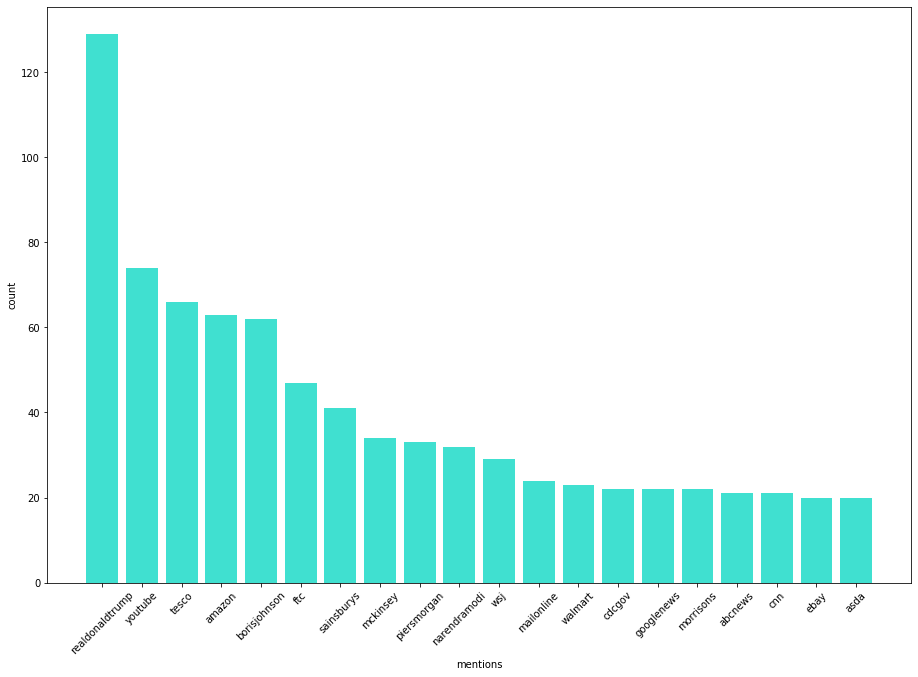

In [65]:
# fig = plt.figure()
fig = plt.figure(figsize=(12,8))
cx = fig.add_axes([0,0,1,1])
cx.bar(top_mentions_df['word'],top_mentions_df['count'], color=['turquoise'])
cx.set_ylabel('count')
cx.set_xlabel('mentions')
plt.xticks(rotation=45)

<h2>Wordclouds for all sentiments</h2>

In [66]:
stop = set(stopwords.words('english'))

cleaned_title = []

for sentance in train_data['OriginalTweet'].values:
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub('<.*?>','',sentance)
    sentance = re.sub(r'@\w+','',sentance)
    sentance = re.sub(r'#\w+','',sentance)
    sentance = re.sub(r'[0-9]+','',sentance)
    sentance = re.sub(r'[0-9]+','',sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_title.append(sentance.strip())
    
train_data['text'] = cleaned_title
train_data.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,hashtags,mentions,text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,MeNyrbie Phil_Gahan Chrisitv,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,,,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,,,coronavirus australia woolworths give elderly ...
3,3802,48754,Vagabonds,16-03-2020,My food stock is not the only one which is emp...,Positive,COVID19france COVID_19 COVID19 coronavirus con...,,food stock one empty please panic enough food ...
4,3803,48755,Vagabonds,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,COVID19 coronavirus CoronavirusFrance restezch...,,ready go supermarket covid outbreak paranoid f...


Text(0.5, 1.0, 'Wordcloud for positive sentiment')

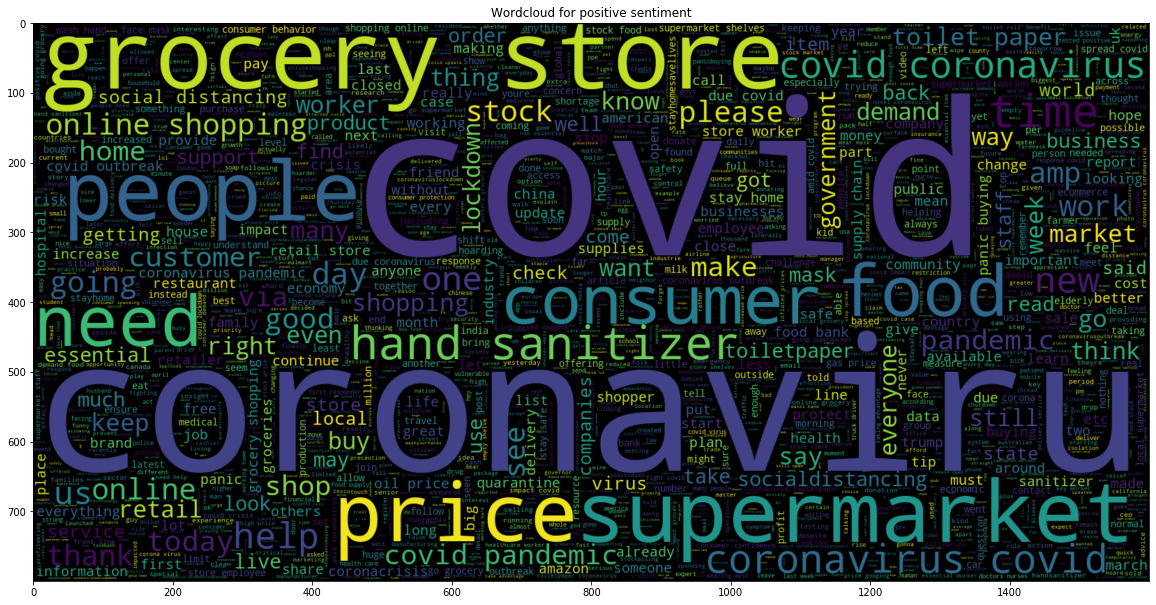

In [67]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data.Sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Wordcloud for positive sentiment")

Text(0.5, 1.0, 'Wordcloud for neutral sentiment')

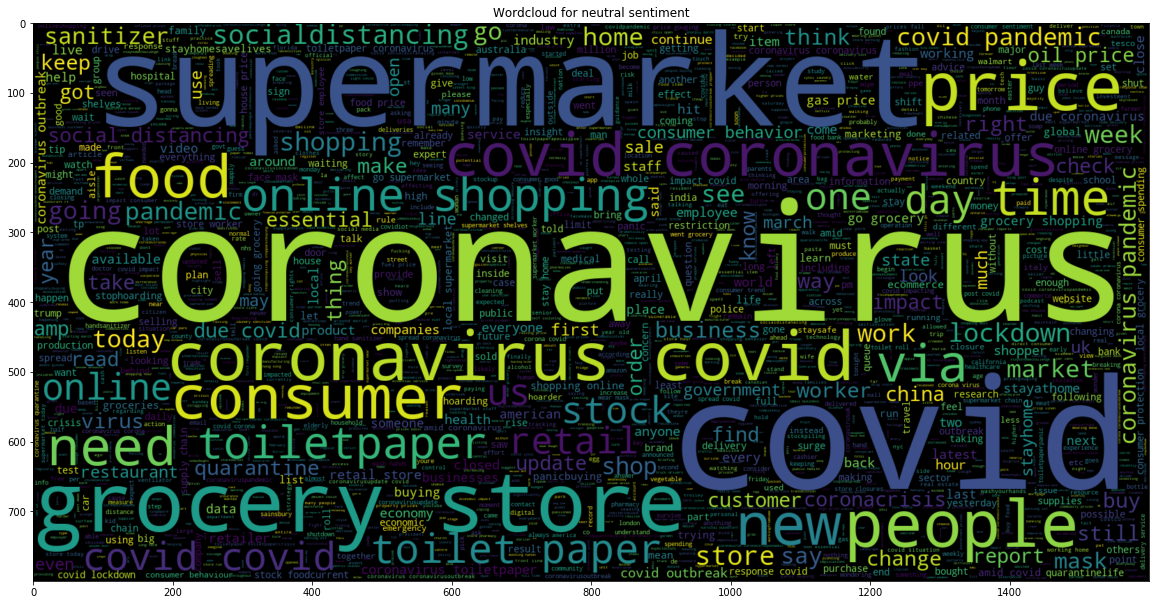

In [68]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data.Sentiment == 'Neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Wordcloud for neutral sentiment")

Text(0.5, 1.0, 'Wordcloud for negative sentiment')

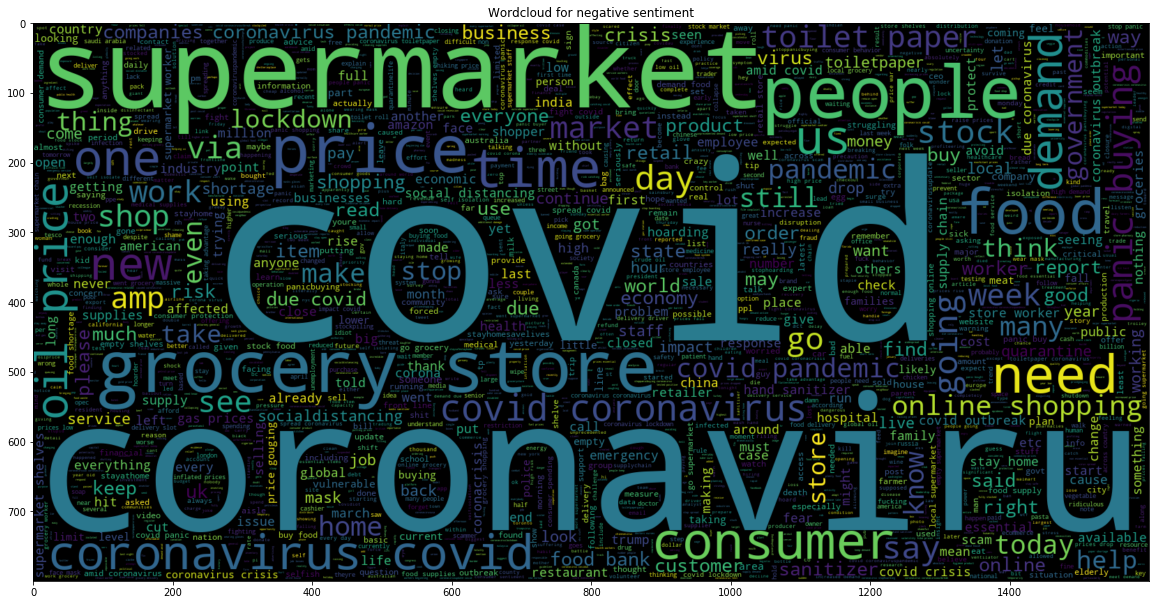

In [69]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data.Sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Wordcloud for negative sentiment")

Text(0.5, 1.0, 'Top 20 uni-grams from Covid-19 Tweets')

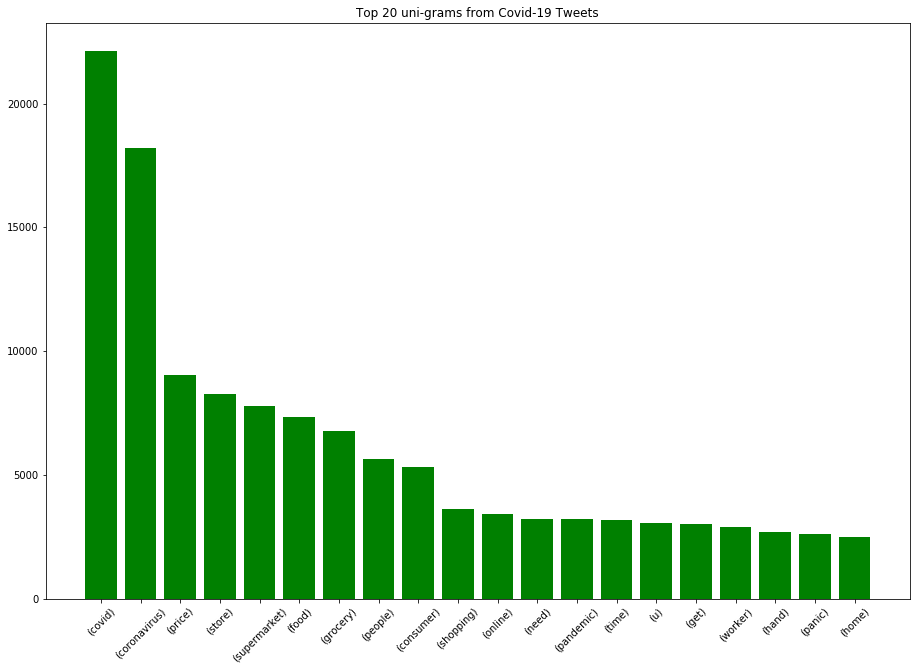

In [78]:
#unigrams
words = basic_clean(''.join(str(train_data['text'].tolist())))
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]
unigrams = pd.DataFrame(unigrams)
unigrams['idx'] = unigrams.index
unigrams['idx'] = unigrams.apply(lambda x: '('+x['idx'][0]+')',axis=1)

fig = plt.figure(figsize=(12,8))
cx = fig.add_axes([0,0,1,1])
cx.bar(unigrams['idx'],unigrams[0], color=['green'])
plt.xticks(rotation=45)
plt.title("Top 20 uni-grams from Covid-19 Tweets")

Text(0.5, 1.0, 'Top 20 bigrams from Covid-19 Tweets')

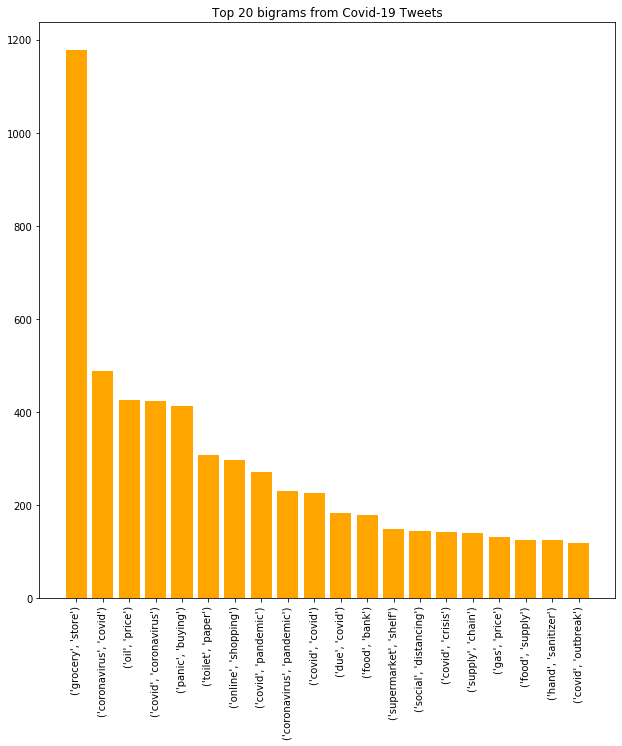

In [109]:
#bigrams
words = basic_clean(''.join(str(train_data[train_data["Sentiment"]=='Negative']['text'].tolist())))
bg = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams=[]
counts=[]
for i in bg.iteritems():
    bigrams.append(str(i[0]))
    counts.append(i[1])
fig = plt.figure(figsize=(8,8))
cx = fig.add_axes([0,0,1,1])
cx.bar(bigrams,counts, color=['orange'])
plt.xticks(rotation=90)
plt.title("Top 20 bigrams from Covid-19 Tweets")

Text(0.5, 1.0, 'Top 20 bigrams from Covid-19 Tweets')

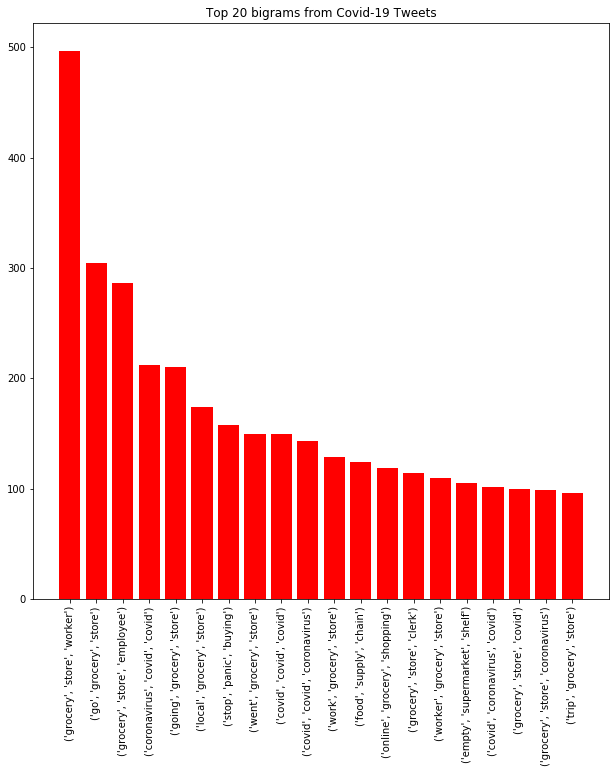

In [110]:
#trigrams
words = basic_clean(''.join(str(train_data['text'].tolist())))
tg = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
trigrams=[]
counts=[]
for i in tg.iteritems():
    trigrams.append(str(i[0]))
    counts.append(i[1])
fig = plt.figure(figsize=(8,8))
cx = fig.add_axes([0,0,1,1])
cx.bar(trigrams,counts, color=['red'])
plt.xticks(rotation=90)
plt.title("Top 20 bigrams from Covid-19 Tweets")